In [1]:
#---------- IMPORTS ----------
from math import log
import numpy as np
from matplotlib import pyplot as plt
from numpy.core.fromnumeric import shape
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.metrics import log_loss
import seaborn as sns 

In [2]:
#---------- PREPROCESSING ----------
#---------- Import data  ----------

data = pd.read_csv(r'C:\Users\Saaqib\Documents\Python\PythonProjects\Covidproject\corona_tested_individuals.csv')
# data = data.sample(frac=0.1, random_state=1234)
print('data=',data)

print(data.info())

# NOTE: could have added check for more than 50% missing data

data = data.drop("test_date", axis='columns')

for col in list(data.columns):
    if ("cough" in col or "fever" in col or "sore_throat" in col or "shortness_of_breath" in col or 
            "head_ache" in col):
            data[col] = data[col].replace("None", float('nan'))
            data[col] = data[col].fillna(0)
            data[col] = data[col].astype(float)

# print(data.isnull().sum(axis = 0))


C:\Users\Saaqib\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


data=          test_date cough fever sore_throat shortness_of_breath head_ache  \
0       2020-04-30     0     0           0                   0         0   
1       2020-04-30     1     0           0                   0         0   
2       2020-04-30     0     1           0                   0         0   
3       2020-04-30     1     0           0                   0         0   
4       2020-04-30     1     0           0                   0         0   
...            ...   ...   ...         ...                 ...       ...   
278843  2020-03-11     0     0           0                   0         0   
278844  2020-03-11     0     0           0                   0         0   
278845  2020-03-11     0     0           0                   0         0   
278846  2020-03-11     0     0           0                   0         0   
278847  2020-03-11     0     0           0                   0         0   

       corona_result age_60_and_above  gender         test_indication  
0        

In [3]:
#---------- Label encode data ---------- 

Le = LabelEncoder()

for col in list(data.columns):
    if ('age_60_and_above' in col or 'gender' in col or 'corona_result' in col or
    'test_indication' in col):
        data[col] = Le.fit_transform(data[col])

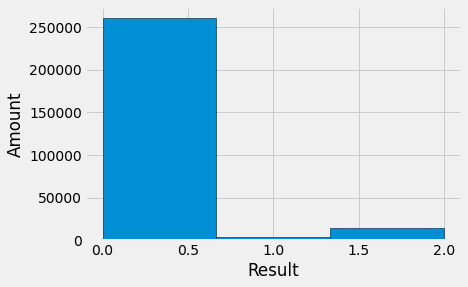

test_indication       -0.205787
age_60_and_above      -0.043783
gender                 0.010596
cough                  0.191128
shortness_of_breath    0.225680
fever                  0.258939
sore_throat            0.269229
head_ache              0.355040
corona_result          1.000000
Name: corona_result, dtype: float64


In [4]:
#---------- Exploring data  ----------

plt.style.use('fivethirtyeight')
plt.hist(data['corona_result'].dropna(), bins = 3, edgecolor = 'k') # NOTE: dropna() removes any missing values, so you can plot. 
# Also returns new df but keeps old one 
plt.xlabel('Result'); plt.ylabel('Amount'); 
plt.show()

# Find all correlations with the score and sort 
correlations_data = data.corr()['corona_result'].sort_values()
print(correlations_data)

# NOTE: you can use scatter plots to find relationships between two continuous variables

# NOTE: can insert scatter diagrams using seaborn 

In [5]:
#---------- One hot encode data ---------- 

Hot_enc = OneHotEncoder()
enc_X = pd.DataFrame(Hot_enc.fit_transform(data[['gender','test_indication']]).toarray())
data = data.join(enc_X)
data = data.drop(columns=['gender','test_indication'])
data = data.rename(columns = {8:"gender_1",9:"gender_2",10:"gender_3",11:"test_ind_1",12:"test_ind_2",13:"test_ind_3"})
print(data)

        cough  fever  sore_throat  shortness_of_breath  head_ache  \
0         0.0    0.0          0.0                  0.0        0.0   
1         1.0    0.0          0.0                  0.0        0.0   
2         0.0    1.0          0.0                  0.0        0.0   
3         1.0    0.0          0.0                  0.0        0.0   
4         1.0    0.0          0.0                  0.0        0.0   
...       ...    ...          ...                  ...        ...   
278843    0.0    0.0          0.0                  0.0        0.0   
278844    0.0    0.0          0.0                  0.0        0.0   
278845    0.0    0.0          0.0                  0.0        0.0   
278846    0.0    0.0          0.0                  0.0        0.0   
278847    0.0    0.0          0.0                  0.0        0.0   

        corona_result  age_60_and_above    0    1    2    3    4    5  
0                   0                 1  0.0  1.0  0.0  0.0  0.0  1.0  
1                   0      

In [6]:
#---------- Colinear features ----------
# NOTE: There is a function to remove colinear features above a threshold
# When there is continous data, use scatter plot

# plot_data = data[['cough', 'fever']].dropna()
# plt.plot(plot_data['cough'], plot_data['fever'])
# plt.xlabel('cough'); plt.ylabel('fever')
# plt.show()

In [7]:
#---------- Split into X and y ----------

X = data.loc[:, data.columns != 'corona_result']
y = data.iloc[:,5]

class_names = ['negative','other','positive']

print('X',X)
print('y',y)


X         cough  fever  sore_throat  shortness_of_breath  head_ache  \
0         0.0    0.0          0.0                  0.0        0.0   
1         1.0    0.0          0.0                  0.0        0.0   
2         0.0    1.0          0.0                  0.0        0.0   
3         1.0    0.0          0.0                  0.0        0.0   
4         1.0    0.0          0.0                  0.0        0.0   
...       ...    ...          ...                  ...        ...   
278843    0.0    0.0          0.0                  0.0        0.0   
278844    0.0    0.0          0.0                  0.0        0.0   
278845    0.0    0.0          0.0                  0.0        0.0   
278846    0.0    0.0          0.0                  0.0        0.0   
278847    0.0    0.0          0.0                  0.0        0.0   

        age_60_and_above    0    1    2    3    4    5  
0                      1  0.0  1.0  0.0  0.0  0.0  1.0  
1                      1  0.0  1.0  0.0  0.0  0.0  1.0 

In [8]:
#---------- Split data set ----------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print('X_train:', X_train.shape)
print('X:', X.shape)
print('y_train:', y_train.shape)
print('y:', y.shape)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # NOTE: Could have done feature selection or PCA for new features but not needed here
# # To prevent overfitting, outliers and noise in linear regression - use regularization techniques like lasso and ridge.

X_train: (223078, 12)
X: (278848, 12)
y_train: (223078,)
y: (278848,)


In [9]:
# #---------- Train Model ----------

# NOTE: Models to evaluate:
# (Linear Regression)
# Support Vector Machine 
# Random Forest Classifier
# Decision Tree Classifier
# Gradient Boosting 
# K-Nearest Neighbors


# Function to calculate mean absolute error - for REGRESSION 
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_acc = accuracy_score(y_test, model_pred)
    
    # Return the performance metric
    return model_acc

In [10]:
#---------- Test different model accuracies ---------- 

# --- svc below but not ideal as takes too long to converge 
# svc_model = svm.SVC(kernel='linear')
# svc_model = fit_and_evaluate(svc_model)


In [11]:
random_tree_model = RandomForestClassifier(max_depth=4, random_state=0)
random_tree_model = fit_and_evaluate(random_tree_model)
print('Random Tree Classifier Performance on the test set: Accuracy = %0.4f' % random_tree_model)

Random Tree Classifier Performance on the test set: Accuracy = 0.9538


In [12]:
decision_tree_model = DecisionTreeClassifier(max_depth=4, random_state=0)
decision_tree_model = fit_and_evaluate(decision_tree_model)
print('Decision Tree Classifier Performance on the test set: Accuracy = %0.4f' % decision_tree_model)


Decision Tree Classifier Performance on the test set: Accuracy = 0.9529


In [13]:
gradient_boosting_classifer = GradientBoostingClassifier(random_state=0)
gradient_boosting_classifer = fit_and_evaluate(gradient_boosting_classifer)
print('Gradient Boosting Classifier Performance on the test set: Accuracy = %0.4f' % gradient_boosting_classifer)

Gradient Boosting Classifier Performance on the test set: Accuracy = 0.9554


In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier = fit_and_evaluate(knn_classifier)
print('KNN Classifier Performance on the test set: Accuracy = %0.4f' % knn_classifier)

KNN Classifier Performance on the test set: Accuracy = 0.9500


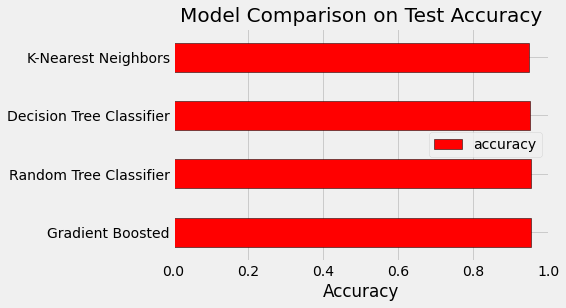

In [15]:
# Plot comparison:
plt.style.use('fivethirtyeight')
# figsize(8,6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Random Tree Classifier', 'Decision Tree Classifier',
                                           'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'accuracy': [random_tree_model, decision_tree_model, gradient_boosting_classifer, 
                                         knn_classifier]})

# Horizontal bar chart of test accuracy
model_comparison.sort_values('accuracy', ascending = False).plot(x = 'model', y = 'accuracy', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Accuracy'); plt.xticks(size = 14)
plt.title('Model Comparison on Test Accuracy', size = 20);
plt.show() 

In [16]:
#---------- Hyperparameter Tuning with Random Search and Cross Validation ----------

# The code below in this hyperparemeter tuning section is what I would use and works,
# however, it takes too long to run on my computer unfortunately so I shall use 
# the generic Gradient Boosting CLassifer function


# # We will do hyperparemeter tuning for Gradient Boosting Classficiation 

# # Loss function to be optimized 
# loss = ['deviance']

# # Number of trees used in the boosting process
# n_estimators = [100, 500, 900, 1500]

# # Maximum depth of each tree
# max_depth = [3, 5, 10, 15]

# # Minimum number of samples per leaf
# min_samples_leaf = [2, 4, 6, 8]

# # Minimum number of samples to split a node
# min_samples_split = [2, 4, 6, 10]

# # Maximum number of features to consider for making splits
# max_features = ['auto', 'sqrt', 'log2', None]

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {'loss': loss,
#                        'n_estimators': n_estimators,
#                        'max_depth': max_depth,
#                        'min_samples_leaf': min_samples_leaf,
#                        'min_samples_split': min_samples_split,
#                        'max_features': max_features}

# # Use the randomised CV to search for best parameters:

# # Create the model to use for hyperparameter tuning
# model = GradientBoostingClassifier(random_state=42)

# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=model,
#                                param_distributions=hyperparameter_grid,
#                                cv=4, n_iter=20, 
#                                scoring = 'accuracy',
#                                n_jobs = -1, verbose = 1, 
#                                return_train_score = True,
#                                random_state=42)


# predicted_cv = random_cv.fit(X, y)
# print(predicted_cv)

In [17]:
gradient_boosting_classifer = GradientBoostingClassifier(random_state=42)
gradient_boosting_classifer = gradient_boosting_classifer.fit(X, y)
    
final_model_pred = gradient_boosting_classifer.predict(X_test)
model_acc = accuracy_score(y_test, final_model_pred)

print('Model Accuracy =', model_acc)

Model Accuracy = 0.9554061323292092


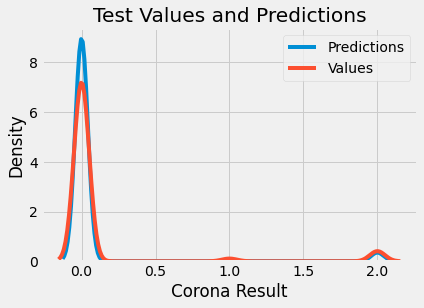

In [18]:
# Density plot of the final predictions and the test values
sns.kdeplot(final_model_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Corona Result'); plt.ylabel('Density');
plt.title('Test Values and Predictions');
plt.legend()
plt.show()

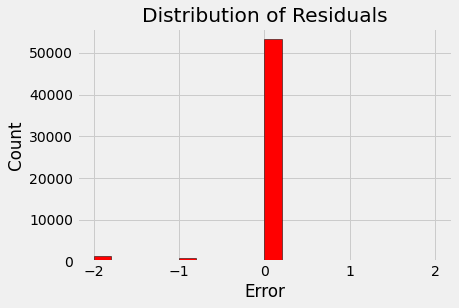

In [19]:
# Calculate the residuals 
residuals = final_model_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

In [20]:
# ---------- Model Interpretation ----------
# ---------- Feature Importance ----------

# # Extract the feature importances into a dataframe
# feature_results = pd.DataFrame({'feature': list(X_train.columns), 
#                                 'importance': final_model_pred.feature_importances_})

# # Show the top 10 most important
# feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

# feature_results.head(10)


In [21]:
# ---------- Visulasing decision tree ---------- 
# For decision trees:

# fig = plt.figure(figsize=(12,12))
# tree.plot_tree(decision_tree_model,class_names=class_names, fontsize=6)
# plt.savefig('tree_high_dpi', dpi=100)
# plt.show()

Confusion matrix, without normalization
[[51622     0   408]
 [  759     0    32]
 [ 1288     0  1661]]
Normalized confusion matrix
[[0.99215837 0.         0.00784163]
 [0.95954488 0.         0.04045512]
 [0.43675822 0.         0.56324178]]


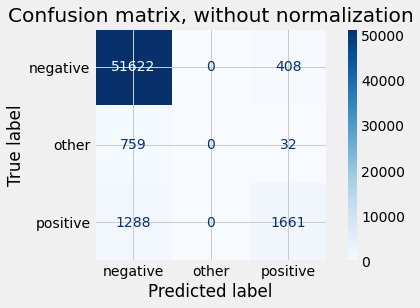

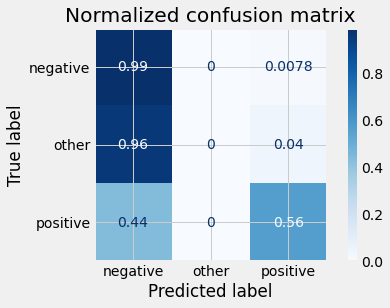

In [22]:
#---------- Performance metrics ----------
# Confusion matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_boosting_classifer, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()